# 결정 트리
SVM처럼 분류와 회귀, 다중 출력도 가능한 다재 다능한 머신러닝 알고리즘임.  
매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘 (특성이 많아도 가능하다는 뜻?)  

---
## 1. 결정 트리의 학습과 시각화

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

In [2]:
x = iris["data"][:, 2:]
y = iris["target"]

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2)

In [4]:
tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=2)

In [5]:
from sklearn.tree import export_graphviz
import os

image_path = "."

export_graphviz(
tree_clf,
out_file=os.path.join(image_path, "iris_tree.dot"),
feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

[Text(133.92000000000002, 181.2, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

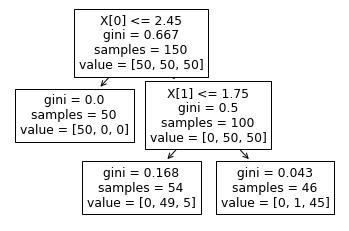

In [6]:
from sklearn.tree import plot_tree

plot_tree(tree_clf)

>위 방법은 트리 시각화 이미지를 내보내는 방법이고  
아래 방법은 내부에서 출력하는 방법

---
## 2. 결정트리로 예측하기
먼저 **루트 노드** 에서 시작.  
이 노드에서 꽃잎의 길이가 2.45보다 짧은지 검사.  
만약 그렇다면 루트 노드의 왼쪽 자식 노드 로 이동. 이 경우 노드가 **리프 노드** (자식 노드를 가지지 않는 노드)이므로 추가적인 검사를 진행하지 않음.  
꽃잎의 길이가 2.45보다 길면 루트 노드의 오른쪽 자식 노드로 이동.  
여기서 추가로 꽃잎의 너비가 1.75보다 작은지 검사

노드의 **샘플** 속성은 해당 노드에 얼마나 많은 학습 샘플이 적용되었는지 헤아린 것  
노드의 **밸류** 속성은 노드에서 각 클래스에 얼마나 많은 학습 샘플이 속해있는지 알려줌  
노드의 **gini** 속성은 **불순도** 를 나타냄  
> 한 노드의 모든 샘플이 같은 클래스라면 **gini = 0**  (순수 노드)  
샘플의 클래스가 섞이면 섞일수록 커질 듯

결정 트리는 직관적이고 결정 방식을 이해하기 쉬움. 이런 모델을 **화이트박스** 모델이라고 함.  
반대로 랜덤포레스트나 신경망은 **블랙박스** 모델임. 이 알고리즘들은 성능은 뛰어나나 예측을 만드는 연산 과정을 쉽게 확인할 수 없음.

---
## 3. 결정트리로 클래스 확률 추정하기
결정트리로도 한 샘플이 특정 클래스 k에 속할 확률을 추정할 수 있음.  
>1. 먼저 이 샘플에 대한 리프 노드를 탐색  
2. 해당 노드에 있는 클래스 k의 훈련 샘플의 비율을 반환

In [7]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])

---
## 4. CART 훈련 알고리즘
사이킷런은 결정 트리를 훈련시키기 위해(= 트리를 성장시키기 위해) **CART(classification and regression tree)** 알고리즘을 사용함.  
일단 CART알고리즘에 대한 설명은 제쳐두겠음.  
>1. CART알고리즘이 훈련 세트를 성공적으로 둘로 나누었다면
2. 같은 방식으로 서브셋을 또 나눔
3. 최대 깊이가 될 때까지, 혹은 불순도를 줄이는 분할을 찾을 수 없을 때까지 반복  
  
중지 조건으로는 다음과 같은 매개변수로 조정 가능
- **max_depth** : 트리의 최대 깊이, 기본값은 제한이 없는 None   
- **min_samples_split** : 분할되기 위해 노드가 가져야 할 최소 샘플수  
- **min_samples_leaf** : 리프노드가 가지고 있어야 할 최소 샘플수  
- **min_weight_fraction_leaf** : min_samples_leaf와 같음. 가중치가 부여된 전체 샘플 수에서의 비율  
- **max_leaf_nodes** : 각 노드에서 분할에 사용할 최대 특성 수  
  
> **min_으로 시작하는 매개변수를 증가시키거나  
max_로 시작하는 매개변수를 감소시키면  
모델의 규제가 커짐**
  
---
## 5. 계산 복잡도
> CART알고리즘은 **그리디 알고리즘** 임. 훌륭한 솔루션을 만들어내지만 최적의 솔루션을 보장하진 못함  
결정트리를 탐색하기 위해선 특성수와 무관하게 **log(m)** 에 비례함  
훈련 알고리즘에서는 모든 훈련 샘플의 모든 특성을 비교함(max_features가 지정되었을 경우): **n x mlog(m)** 에 비례함  
학습데이터셋이 수천 개 이하의 샘플 정도로 작다면 미리 데이터를 정렬하여 훈련 속도를 높일 수 있음 **(presort=True)**  
학습데이터셋이 너무 크면 속도가 많이 느려짐

---
## 6. 지니 불순도 대신 엔트로피
기본적으로 지니 불순도가 사용되지만 **criterion** 매개변수를 **entropy** 로 지정하여 엔트로피 불순도를 사용할 수도 있음.  
어떤 세트가 한 클래스의 샘플만 담고 있다면 엔트로피 = 0임. 
> 지니 불순도를 사용하면 가장 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이 있음  
엔트로피를 사용하면 좀 더 균형 잢힌 트리를 만듬  
그러나 지니 불순도가 계산이 더 빠르기 때문에 기본값으로 좋음  

---
## 7. 결정 트리를 이용한 회귀
결정 트리는 회귀 문제에도 적용이 가능함. 트리 자체는 분류 트리와 매우 비슷하지만  
각 노드에서 클래스를 예측하는 것이 아니라 **어떤 값을 예측함**  
> 정확히 말하면 **리프 노드에 있는 훈련 샘플의 평균 타깃값** 이 예측값이 됨

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x, y)

DecisionTreeRegressor(max_depth=2)

[Text(133.92000000000002, 181.2, 'X[0] <= 2.45\nmse = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(66.96000000000001, 108.72, 'mse = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(200.88000000000002, 108.72, 'X[1] <= 1.75\nmse = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(133.92000000000002, 36.23999999999998, 'mse = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(267.84000000000003, 36.23999999999998, 'mse = 0.021\nsamples = 46\nvalue = 1.978')]

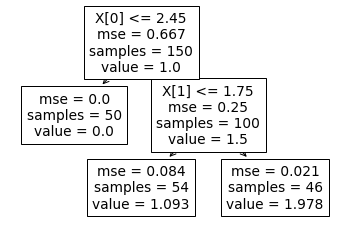

In [10]:
plot_tree(tree_reg)

---
## 8. 트리의 장단점
**장점**  
> 이해와 해석이 쉬움  
사용하기 편함  
여러 용도로 사용할 수 있음  
성능이 뛰어남  

  
**단점**  
> 계단 모양의 결정 경계를 만듬 : 모든 분할은 축에 수직 -> **학습데이터의 회전에 민감함**  

이런 문제를 보완하기 위해 PCA기법을 사용하여 학습 데이터를 더 좋은 방향으로 회전시킬 수 있음